## **Dataset de Google Maps - Sitios**

Definimos un proceso eficiente para lidiar con la información de 11 archivos de establecimientos. Cargamos la mitad en un DataFrame y luego la otra mitad en otro para un procesamiento más rápido. Luego, unificamos los DataFrames para un análisis completo. Este enfoque optimizado mejora la velocidad y el uso de recursos, lo que nos permite obtener una visión global de los datos.

In [3]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import plotly.express as px

In [5]:
data_folder = 'Dataset de Google Maps\\metadata.sitios\\metadata.sitios'
file_names_to_read = ['1.json', '2.json', '3.json', '4.json', '5.json', '6.json']
rows = []

for filename in file_names_to_read:
    file_path = os.path.join(data_folder, filename)
    with open(file_path) as f:
        for line in f:
            try:
                data = json.loads(line)
                rows.append(data)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON in {filename}: {e}")

data_sitios1 = pd.DataFrame(rows)

In [6]:
data_folder = 'Dataset de Google Maps\\metadata.sitios\\metadata.sitios'
file_names_to_read = ['7.json', '8.json', '9.json', '10.json', '11.json']
rows = []

for filename in file_names_to_read:
    file_path = os.path.join(data_folder, filename)
    with open(file_path) as f:
        for line in f:
            try:
                data = json.loads(line)
                rows.append(data)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON in {filename}: {e}")

data_sitios2 = pd.DataFrame(rows)

Unificar los df

In [7]:
data_sitios = pd.concat([data_sitios1, data_sitios2], ignore_index=True)

---

In [8]:
data_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025011 entries, 0 to 3025010
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              object 
 1   address           object 
 2   gmap_id           object 
 3   description       object 
 4   latitude          float64
 5   longitude         float64
 6   category          object 
 7   avg_rating        float64
 8   num_of_reviews    int64  
 9   price             object 
 10  hours             object 
 11  MISC              object 
 12  state             object 
 13  relative_results  object 
 14  url               object 
dtypes: float64(3), int64(1), object(11)
memory usage: 346.2+ MB


In [10]:
data_sitios.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


Convertir las listas de la columna "category" en valores únicos separados por comas

In [10]:
data_sitios['category'] = data_sitios['category'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

data_sitios.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,Pharmacy,4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,Textile exporter,4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,Korean restaurant,4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,Fabric store,3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,Fabric store,4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


Realizamos un análisis de duplicados en base a la columna "gmap_id" para tomar decisiones respecto al manejo de los datos. Este proceso nos permite garantizar la integridad y calidad de la información.

In [12]:
duplicates = data_sitios[data_sitios['gmap_id'].duplicated(keep=False)]
duplicates_count = duplicates['gmap_id'].value_counts()

print("Total de duplicados en 'gmap_id':", len(duplicates))

Total de duplicados en 'gmap_id': 53156



Seleccionamos un registro al azar para examinar sus duplicados y evaluar si comparten la misma información en todas las columnas. Este enfoque nos ayuda a identificar duplicados y asegurarnos de que la eliminación de registros no tenga un impacto significativo en la cantidad total de datos en el conjunto.

In [13]:
duplicates.sample()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
26632,T-Mobile,"T-Mobile, 3923 103rd St, Queens, NY 11368",0x89c25fc9494dce47:0x6d63c807b59a55,None,40.750146,-73.862536,"Cell phone store, Electronic parts supplier, E...",3.5,95,$$,"[[Thursday, 10AM–8PM], [Friday, 10AM–8PM], [Sa...","{'Service options': ['In-store shopping', 'Del...",Open ⋅ Closes 8PM,"[0x89c25fc7a91c609f:0xb103d6a261373fd, 0x89c25...",https://www.google.com/maps/place//data=!4m2!3...


In [14]:
filtered_result = data_sitios[data_sitios['name'] == 'London Go Karts']

filtered_result

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
25136,London Go Karts,"London Go Karts, 323 Levi Jackson Mill Rd, Lon...",0x885ccdb4d45f1757:0x848ff530a65c115f,None,37.085907,-84.058622,Go-kart track,5.0,3,None,"[[Tuesday, 9AM–10PM], [Wednesday, 9AM–10PM], [...",{'Amenities': ['Good for kids']},Permanently closed,"[0x88434e1ca4a62b7b:0xf303151389c11883, 0x885c...",https://www.google.com/maps/place//data=!4m2!3...
51709,London Go Karts,"London Go Karts, 323 Levi Jackson Mill Rd, Lon...",0x885ccdb4d45f1757:0x848ff530a65c115f,None,37.085907,-84.058622,Go-kart track,5.0,3,None,"[[Tuesday, 9AM–10PM], [Wednesday, 9AM–10PM], [...",{'Amenities': ['Good for kids']},Permanently closed,"[0x88434e1ca4a62b7b:0xf303151389c11883, 0x885c...",https://www.google.com/maps/place//data=!4m2!3...


Después de confirmar que los duplicados comparten la misma información en todas sus columnas, procedemos a eliminar estos registros.

In [11]:
data_sitios.drop_duplicates(subset='name', inplace=True)

data_sitios.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,Pharmacy,4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,Textile exporter,4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,Korean restaurant,4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,Fabric store,3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,Fabric store,4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


Realizamos una inspección detallada de la columna "MISC" para evaluar su contribución al enfoque del proyecto. Al notar que esta columna contiene información sobre características, comodidades y aspectos destacados de cada ubicación, hemos decidido eliminarla. Esta decisión se tomó para simplificar el conjunto de datos y centrarnos en las columnas más relevantes para nuestros objetivos.

In [12]:
for value in data_sitios['MISC'].sample(n=5, random_state=42):
    print(value)

{'From the business': ['Identifies as women-led'], 'Accessibility': ['Wheelchair accessible entrance']}
{'Accessibility': ['Wheelchair accessible entrance'], 'Offerings': ['Oil change'], 'Amenities': ['Mechanic'], 'Planning': ['Appointments recommended']}
{'Accessibility': ['Wheelchair accessible entrance'], 'Planning': ['Appointments recommended']}
None
None


Realizamos un análisis exhaustivo de la cantidad de valores nulos por columna en el conjunto de datos. Evaluamos la relevancia de la información que aportan estas columnas y cómo contribuyen a nuestros objetivos. Con base en esta evaluación, consideramos la posibilidad de reducir la cantidad de datos en el dataset eliminando aquellas columnas con una cantidad significativa de valores nulos que no aportan información crucial para el proyecto. Esta estrategia nos ayuda a concentrarnos en los datos más relevantes y a mejorar la eficiencia del análisis.

In [23]:
null_percentages = (data_sitios.isnull().sum() / len(data_sitios)) * 100

null_info_df = pd.DataFrame({
    'Columna': null_percentages.index,
    'Cantidad_Nulos': null_counts.values,
    'Porcentaje_Nulos': null_percentages.values.round(2)
})

null_info_df

,Columna,Cantidad_Nulos,Porcentaje_Nulos
0,name,1,0.00
1,address,75478,3.27
2,gmap_id,0,0.00
3,description,2230159,96.63
4,latitude,0,0.00
5,longitude,0,0.00
6,category,15828,0.69
7,avg_rating,0,0.00
8,num_of_reviews,0,0.00
9,price,2222011,96.27


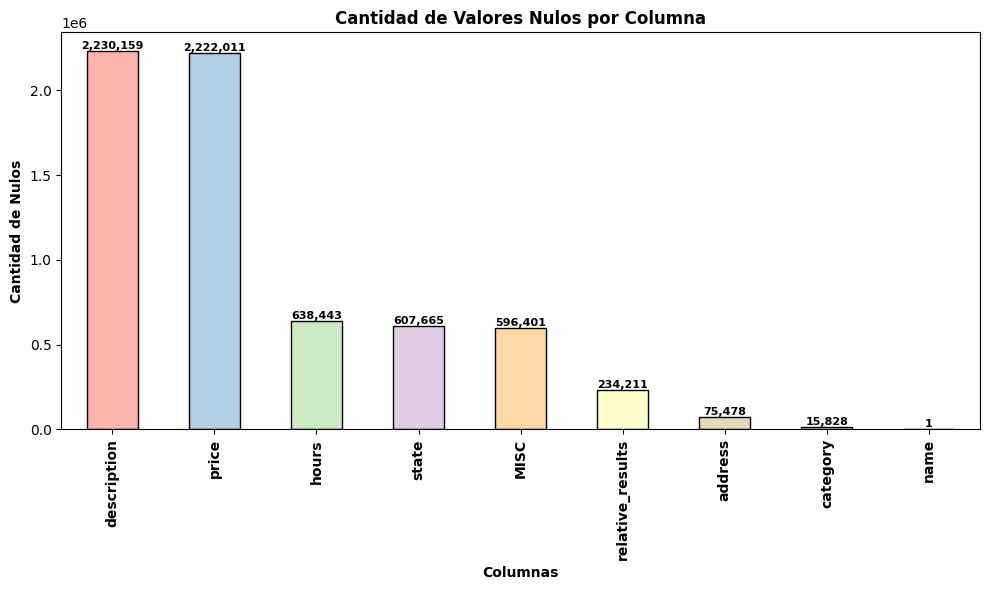

In [30]:
# Calcular la cantidad de nulos por columna
null_counts = data_sitios.isnull().sum()

# Filtrar las columnas que tienen nulos
columns_with_nans = null_counts[null_counts > 0]

# Ordenar las columnas de mayor a menor cantidad de nulos
sorted_null_counts = columns_with_nans.sort_values(ascending=False)

# Crear la figura y el gráfico de barras
plt.figure(figsize=(10, 6))
plot = sorted_null_counts.plot(kind='bar', color=plt.cm.Pastel1(np.arange(len(sorted_null_counts))), edgecolor='black')

# Agregar números formateados en las barras
for i, v in enumerate(sorted_null_counts):
    formatted_value = '{:,.0f}'.format(v)  # Formatear el número con separadores de miles
    plt.text(i, v + 50, formatted_value, ha='center', va='bottom', fontsize=8, fontweight='bold')

# Agregar etiquetas y título en negritas
plt.xlabel('Columnas', fontweight='bold')
plt.ylabel('Cantidad de Nulos', fontweight='bold')
plt.title('Cantidad de Valores Nulos por Columna', fontweight='bold')

# Cambiar el estilo de las etiquetas del eje x a negritas
plt.xticks(range(len(sorted_null_counts.index)), sorted_null_counts.index, rotation=90, fontweight='bold')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [31]:
columns_to_drop = ['price', 'hours', 'MISC', 'state', 'relative_results', 'description', 'url']
data_sitios.drop(columns=columns_to_drop, inplace=True)

data_sitios

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,Pharmacy,4.9,16
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,34.018891,-118.215290,Textile exporter,4.5,6
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,Korean restaurant,4.4,18
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,34.023669,-118.232930,Fabric store,3.3,6
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,34.036694,-118.249421,Fabric store,4.3,7
...,...,...,...,...,...,...,...,...
3025006,Steak 48,"Steak 48, 260 S Broad St, Philadelphia, PA 19102",0x89c6c74f43a49b55:0x6be6995921c58b12,39.947254,-75.164953,"Steak house, Fine dining restaurant, Seafood r...",4.6,308
3025007,"Jack Mcnerney Chevrolet, Inc.","Jack Mcnerney Chevrolet, Inc., 363 NY-281, Tul...",0x89da1787d3fdc4a5:0xce92ea6e3cd4d1cc,42.788636,-76.122120,Chevrolet dealer,4.4,143
3025008,Central Ny Spay Neuter Assista,"Central Ny Spay Neuter Assista, 17 Salisbury S...",0x89da6b9ce832726f:0xbd0d3630f1e3b42e,42.603831,-76.165286,Veterinarian,4.3,88
3025009,Ok Feed Store,"Ok Feed Store, 16300 SW 296th St, Homestead, F...",0x88d9e872a9e39f3d:0x5de29f50507e5d73,25.491641,-80.456076,Animal feed store,4.9,13


Tomamos la decisión de enfocarnos en la columna "category" como parte fundamental para nuestras decisiones. Dado que esta columna es crucial para determinar cómo trabajar con diferentes porciones de datos, optamos por eliminar los registros con valores nulos en esta columna. Esto nos permite mantener la integridad de los datos relevantes para nuestro análisis y tomar decisiones basadas en información valiosa.

In [32]:
data_sitios.dropna(subset=['category'], inplace=True)

data_sitios

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,Pharmacy,4.9,16
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,34.018891,-118.215290,Textile exporter,4.5,6
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,Korean restaurant,4.4,18
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,34.023669,-118.232930,Fabric store,3.3,6
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,34.036694,-118.249421,Fabric store,4.3,7
...,...,...,...,...,...,...,...,...
3025006,Steak 48,"Steak 48, 260 S Broad St, Philadelphia, PA 19102",0x89c6c74f43a49b55:0x6be6995921c58b12,39.947254,-75.164953,"Steak house, Fine dining restaurant, Seafood r...",4.6,308
3025007,"Jack Mcnerney Chevrolet, Inc.","Jack Mcnerney Chevrolet, Inc., 363 NY-281, Tul...",0x89da1787d3fdc4a5:0xce92ea6e3cd4d1cc,42.788636,-76.122120,Chevrolet dealer,4.4,143
3025008,Central Ny Spay Neuter Assista,"Central Ny Spay Neuter Assista, 17 Salisbury S...",0x89da6b9ce832726f:0xbd0d3630f1e3b42e,42.603831,-76.165286,Veterinarian,4.3,88
3025009,Ok Feed Store,"Ok Feed Store, 16300 SW 296th St, Homestead, F...",0x88d9e872a9e39f3d:0x5de29f50507e5d73,25.491641,-80.456076,Animal feed store,4.9,13


Con el objetivo de asegurar la integridad y utilidad de nuestros datos, hemos procedido a eliminar los valores nulos restantes en las columnas 'address' y 'name'. Esta medida nos permitirá contar con una base de datos más limpia y coherente, preparada para su utilización sin inconvenientes. La eliminación de estos valores nulos contribuye a garantizar la calidad de la información que ponemos a disposición y a optimizar su aprovechamiento en nuestras futuras tareas y análisis.

In [36]:
data_sitios = data_sitios.dropna()

Se ha tomado la acción de guardar los datos limpios en un archivo con formato Parquet. Esta elección proporciona beneficios significativos para futuros análisis y procesamientos. El formato Parquet es altamente eficiente en términos de almacenamiento y compresión, lo que ayuda a reducir el espacio ocupado por los datos en el almacenamiento. Además, Parquet es compatible con la ejecución paralela y la compresión de datos columnares, lo que acelera las consultas y el procesamiento en sistemas distribuidos. Al elegir el formato Parquet, estamos preparando nuestros datos para un acceso más rápido y eficiente en futuras etapas de análisis, permitiendo un flujo de trabajo más eficiente y una mejor utilización de los recursos de cómputo.

In [38]:
data_folder = 'Dataset de Google Maps\\metadata.sitios'
parquet_filepath = os.path.join(data_folder, 'data_sitios.parquet')

data_sitios.to_parquet(parquet_filepath, index=False)

print(f"Datos guardados en {parquet_filepath}")

Datos guardados en Dataset de Google Maps\metadata.sitios\data_sitios.parquet


---
---

Luego de haber guardado los datos en el formato Parquet, procedemos a evaluar el tiempo requerido para cargar el archivo. Esta verificación nos permite tener una idea clara del rendimiento y la eficiencia del formato Parquet en términos de velocidad de carga. Al conocer el tiempo de procesamiento, podemos asegurarnos de que nuestras decisiones de almacenamiento estén respaldadas por resultados tangibles y tomar medidas para optimizar aún más nuestro flujo de trabajo si es necesario.

In [71]:
parquet_filepath = 'Dataset de Google Maps\\metadata.sitios\\data_sitios.parquet'

data_sitios = pd.read_parquet(parquet_filepath)

In [40]:
data_sitios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216703 entries, 0 to 2216702
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   name            object 
 1   address         object 
 2   gmap_id         object 
 3   latitude        float64
 4   longitude       float64
 5   category        object 
 6   avg_rating      float64
 7   num_of_reviews  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 135.3+ MB


Hemos iniciado el proceso de validar la cantidad de categorías diferentes disponibles en nuestros datos. Esta validación es esencial para comprender la diversidad y amplitud de las categorías presentes en el conjunto de datos. Al conocer el número y la variedad de categorías, podremos tomar decisiones más informadas sobre cómo enfocar nuestro análisis y aprovechar al máximo la información proporcionada en cada categoría.

In [41]:
num_unique_categories = data_sitios['category'].nunique()
print("Número de categorías únicas:", num_unique_categories)

Número de categorías únicas: 310064


In [42]:
category_counts = data_sitios['category'].value_counts()
category_counts

category
Restaurant                                                                                                                                                  34542
Auto repair shop                                                                                                                                            29093
Church                                                                                                                                                      25750
Park                                                                                                                                                        23649
Beauty salon                                                                                                                                                21151
                                                                                                                                                            ...  
Towing service, Aut

Utilizando un gráfico de barras, visualizamos el top 10 de las categorías con la mayor cantidad de registros. Este enfoque nos permite identificar rápidamente las categorías más predominantes en el conjunto de datos. Al segmentar y filtrar los datos en función de estas categorías principales, estamos preparando una base sólida para nuestras futuras exploraciones y análisis más detallados. Esta estrategia nos ayuda a concentrarnos en áreas específicas de interés y a obtener insights más precisos y significativos.

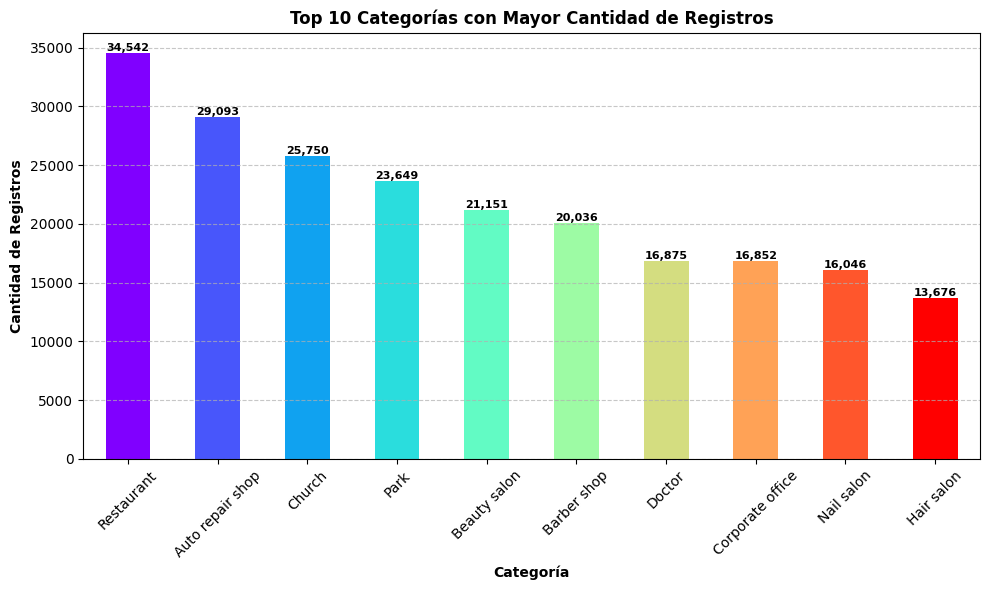

In [44]:
# Obtener el conteo de registros por categoría
category_counts = data_sitios['category'].value_counts()

# Tomar las primeras 10 categorías con mayor conteo
top_10_categories = category_counts.head(10)

# Crear una paleta de colores tipo arcoíris
num_colors = len(top_10_categories)
colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))

# Graficar las primeras 10 categorías con colores arcoíris
plt.figure(figsize=(10, 6))
bars = top_10_categories.plot(kind='bar', color=colors)  # Asignar los colores arcoíris

plt.title('Top 10 Categorías con Mayor Cantidad de Registros', fontweight='bold')
plt.xlabel('Categoría', fontweight='bold')
plt.ylabel('Cantidad de Registros', fontweight='bold')
plt.xticks(rotation=45)

# Agregar cuadrícula
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Mostrar valores en las barras con separador de miles
for bar, color in zip(bars.patches, colors):
    yval = bar.get_height()
    formatted_value = '{:,.0f}'.format(yval)  # Formatear el número con separadores de miles
    plt.text(bar.get_x() + bar.get_width()/2, yval, formatted_value, ha='center', va='bottom', color='black', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()

Aprovechando la columna "num_of_reviews", generamos una visualización que muestra las categorías con la mayor cantidad de reseñas (reviews). Esta representación gráfica nos permite comparar y contrastar con la visualización anterior y verificar si hay coincidencias en las categorías más destacadas en términos de registros y reseñas. Al analizar estas coincidencias, obtenemos una comprensión más profunda de las categorías que generan más atención y participación por parte de los usuarios, lo que puede influir en nuestras decisiones y enfoques futuros.

In [52]:
# Agrupar por "category" y sumar los valores de "num_of_reviews"
sum_reviews_by_category = data_sitios.groupby('category')['num_of_reviews'].sum()

sum_reviews_by_category = sum_reviews_by_category.sort_values(ascending=False)

sum_reviews_by_category

category
Restaurant                                                                                                                                                                                             1348616
Shopping mall                                                                                                                                                                                          1115315
Nail salon                                                                                                                                                                                             1009614
Dentist                                                                                                                                                                                                 912376
Barber shop                                                                                                                                                        

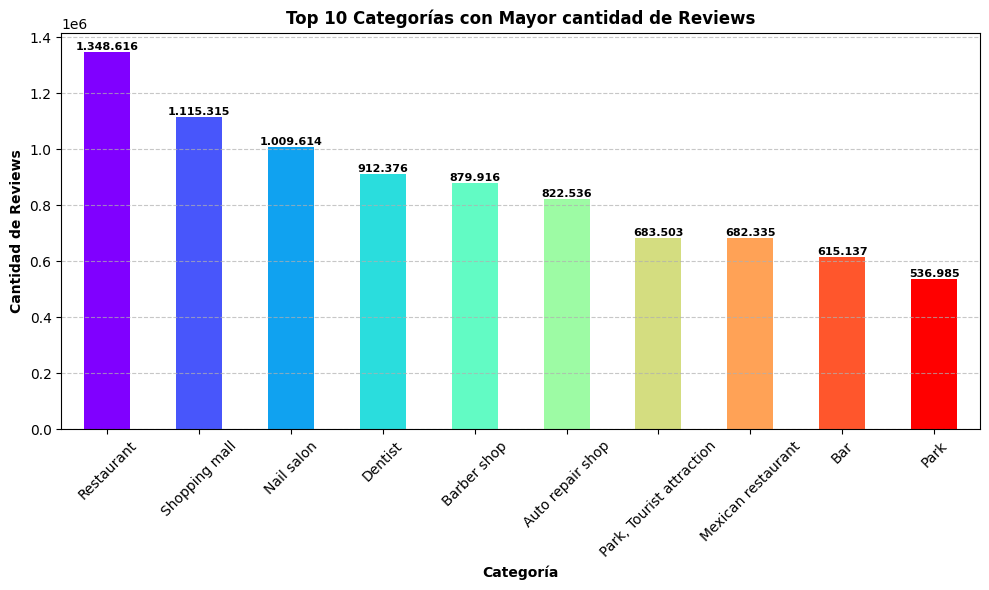

In [56]:
# Graficar las primeras 10 categorías
plt.figure(figsize=(10, 6))
bars = sum_reviews_by_category.head(10).plot(kind='bar', color=plt.cm.rainbow(np.linspace(0, 1, 10)))

plt.title('Top 10 Categorías con Mayor cantidad de Reviews', fontweight='bold')
plt.xlabel('Categoría', fontweight='bold')
plt.ylabel('Cantidad de Reviews', fontweight='bold')
plt.xticks(rotation=45)

# Agregar cuadrícula
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Mostrar valores en las barras
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:,.0f}'.format(yval).replace(',', '.'), ha='center', va='bottom', color='black', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()


Observamos que la categoría "Restaurant" es una de las más sobresalientes en los análisis anteriores. Dada su prominencia y relevancia, podemos considerar filtrar nuestro conjunto de datos en función de esta categoría. Esta decisión nos permitiría centrarnos en un segmento específico que ha demostrado ser influyente en nuestras exploraciones anteriores, lo que posiblemente nos llevaría a obtener información más profunda y significativa sobre establecimientos del tipo "Restaurant".


Realizamos una exploración mediante un gráfico de bigotes en la columna 'avg_rating' con el objetivo de identificar posibles valores atípicos. Esta visualización nos ayuda a comprender mejor la distribución de los datos y detectar valores que se apartan significativamente de la norma. Al identificar estos valores atípicos, podemos tomar decisiones informadas sobre si es necesario aplicar algún tipo de tratamiento a la columna 'avg_rating', lo que contribuiría a la integridad y la calidad de nuestros análisis subsiguientes.

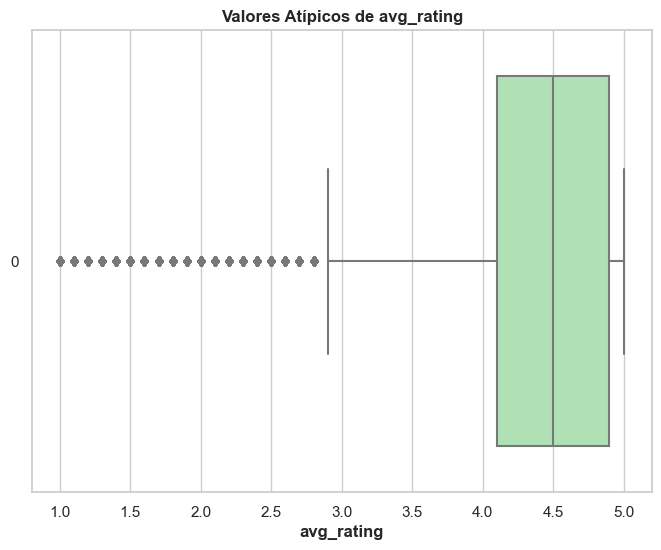

In [57]:
# Definir una paleta de colores personalizada (verde claro)
custom_palette = ["#A7E9AF"]  # Puedes ajustar el código de color según tus preferencias

# Configurar el estilo de los gráficos de Seaborn
sns.set(style="whitegrid", palette=custom_palette)

# Crear un gráfico de bigotes con personalizaciones
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=data_sitios['avg_rating'], orient='h')

# Personalizar el título y etiquetas con negritas
plt.title("Valores Atípicos de avg_rating", fontweight='bold')
plt.xlabel("avg_rating", fontweight='bold')

# Mostrar el gráfico
plt.show()

Exploramos en detalle la distribución de calificaciones, enfocándonos en el rango de 1 a 5. Esta concentración es esencial para entender la opinión predominante de los usuarios. La visualización revela patrones en la cantidad de reseñas para cada nivel de calificación.

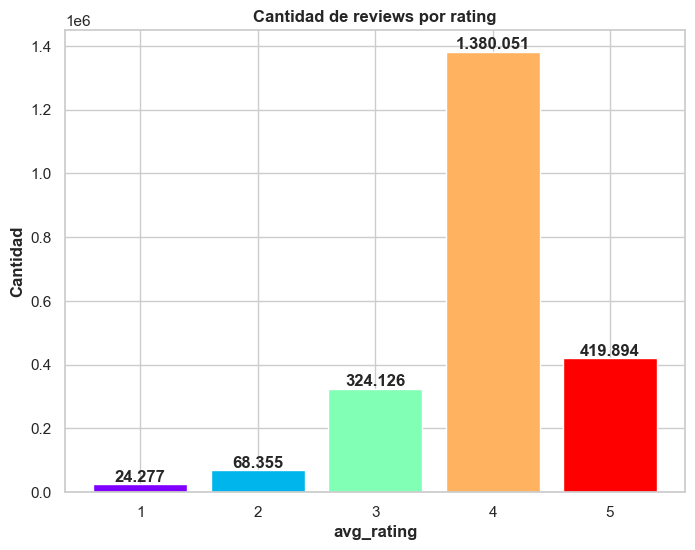

In [59]:
# Filtrar los valores enteros en el rango de 1 a 5
filtered_data = data_sitios[data_sitios['avg_rating'].between(1, 5, inclusive='both')]
filtered_data['avg_rating'] = filtered_data['avg_rating'].astype(int)  # Convertir a enteros

# Contar la frecuencia de cada valor entero en la columna "avg_rating"
rating_counts = filtered_data['avg_rating'].value_counts().sort_index()

# Crear una paleta de colores del arcoíris
num_colors = len(rating_counts)
rainbow_palette = plt.cm.rainbow(np.linspace(0, 1, num_colors))

# Crear un gráfico de barras con colores personalizados
plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=rainbow_palette)

# Agregar título y etiquetas a los ejes en negrita
plt.title("Cantidad de reviews por rating", fontweight='bold')
plt.xlabel("avg_rating", fontweight='bold')
plt.ylabel("Cantidad", fontweight='bold')

# Personalizar las etiquetas del eje x para mostrar solo números enteros
plt.xticks(rating_counts.index, rating_counts.index)

# Agregar el valor en cada barra
for bar, value in zip(bars, rating_counts.values):
    formatted_value = '{:,.0f}'.format(value).replace(',', '.')
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), formatted_value,
             va='bottom', ha='center', fontweight='bold')

# Mostrar el gráfico
plt.show()

Dado que la categoría 'Restaurante' se destaca significativamente con la mayor cantidad de registros y reseñas en nuestro conjunto de datos, hemos tomado la decisión de enfocar nuestro análisis exclusivamente en esta porción específica. Mediante la aplicación de un filtro, hemos segmentado el conjunto de datos para incluir únicamente aquellos registros que pertenecen a la categoría 'Restaurante'. Esta elección nos permite dirigir nuestros esfuerzos hacia un análisis más profundo y detallado de esta categoría en particular, lo que a su vez nos proporcionará insights más relevantes y concretos para nuestra investigación.

In [72]:
# Filtramos el DataFrame por la categoría 'restaurant'
data_sitios = data_sitios[data_sitios['category'] == 'Restaurant']

data_sitios

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews
6,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,33.916402,-118.010855,Restaurant,4.5,18
65,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,39.940293,-75.150923,Restaurant,4.0,8
90,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,21.637796,-157.920714,Restaurant,4.4,18
103,Cape Seafood Shack,"Cape Seafood Shack, 603 Del Prado Blvd S, Cape...",0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,26.641377,-81.940545,Restaurant,5.0,1
111,Golden Castle,"Golden Castle, 1906 E 12th St, Austin, TX 78702",0x8644b59b8fe872e5:0x5e638876caa84cc3,30.273985,-97.719563,Restaurant,4.5,8
...,...,...,...,...,...,...,...,...
2216385,Kellz's,"Kellz's, 3605 Auburn St, Rockford, IL 61101",0x880895be3a9be00f:0xa3a9327c8a78c19,42.288716,-89.114199,Restaurant,4.1,18
2216434,CHiKN Pop-Up,"CHiKN Pop-Up, 5055 PA-8, Gibsonia, PA 15044",0x88348f87f1f45937:0x858b5082b070b572,40.607697,-79.947518,Restaurant,3.8,4
2216444,Craw Daddy's Seafood and Steaks,"Craw Daddy's Seafood and Steaks, 1028 Central ...",0x86532148d4077c6f:0x909aeaa34d8d7699,33.932680,-98.517603,Restaurant,3.2,198
2216464,Mrs Rice's Oriental Restaurant,"Mrs Rice's Oriental Restaurant, 1355 Broadway ...",0x80d94e823b18f809:0x8184c792243025ff,32.602569,-117.077593,Restaurant,4.6,88


In [74]:
data_sitios.reset_index(drop=True, inplace=True)

data_sitios

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews
0,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,33.916402,-118.010855,Restaurant,4.5,18
1,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,39.940293,-75.150923,Restaurant,4.0,8
2,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,21.637796,-157.920714,Restaurant,4.4,18
3,Cape Seafood Shack,"Cape Seafood Shack, 603 Del Prado Blvd S, Cape...",0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,26.641377,-81.940545,Restaurant,5.0,1
4,Golden Castle,"Golden Castle, 1906 E 12th St, Austin, TX 78702",0x8644b59b8fe872e5:0x5e638876caa84cc3,30.273985,-97.719563,Restaurant,4.5,8
...,...,...,...,...,...,...,...,...
34537,Kellz's,"Kellz's, 3605 Auburn St, Rockford, IL 61101",0x880895be3a9be00f:0xa3a9327c8a78c19,42.288716,-89.114199,Restaurant,4.1,18
34538,CHiKN Pop-Up,"CHiKN Pop-Up, 5055 PA-8, Gibsonia, PA 15044",0x88348f87f1f45937:0x858b5082b070b572,40.607697,-79.947518,Restaurant,3.8,4
34539,Craw Daddy's Seafood and Steaks,"Craw Daddy's Seafood and Steaks, 1028 Central ...",0x86532148d4077c6f:0x909aeaa34d8d7699,33.932680,-98.517603,Restaurant,3.2,198
34540,Mrs Rice's Oriental Restaurant,"Mrs Rice's Oriental Restaurant, 1355 Broadway ...",0x80d94e823b18f809:0x8184c792243025ff,32.602569,-117.077593,Restaurant,4.6,88


Previamente, habíamos adquirido los estados del país junto con sus respectivas coordenadas geográficas. En esta etapa, procedemos a la importación de este archivo con el propósito de utilizarlo como referencia en nuestro dataframe principal, 'data_sitios'. Al hacerlo, habilitamos la capacidad de búsqueda y correspondencia entre los estados y sus coordenadas con la información contenida en 'data_sitios'. Esta combinación nos permite enriquecer nuestro análisis al sumar información geoespacial a los datos existentes, proporcionando una dimensión adicional a nuestra evaluación de los sitios en estudio.

In [68]:
ruta_csv = r"Dataset de Google Maps\metadata.sitios\datos_estados_geograficos.csv"

datos_estados_geograficos = pd.read_csv(ruta_csv)

En este fragmento de código, hemos diseñado una función con el objetivo de lograr una correspondencia precisa entre los registros contenidos en el dataframe 'data_sitios' y los estados geográficos correspondientes. Para llevar a cabo esta tarea, nos valemos de las coordenadas geográficas de cada registro, comparándolas con las coordenadas de los estados almacenadas en el archivo 'datos_estados_geograficos'. De esta manera, determinamos con precisión a qué estado pertenece cada sitio en estudio. Esta acción nos permite enriquecer nuestros datos y proporciona un contexto geoespacial fundamental para análisis y visualizaciones posteriores."

In [75]:
# Calcula la distancia euclidiana entre las coordenadas de cada sitio en data_sitios y todas las coordenadas de estados en el DataFrame datos_estados_geograficos

def calculate_distance(coord1, coord2):
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

# Lista para almacenar el estado correspondiente a cada conjunto de coordenadas
state_column = []

for index, row in data_sitios.iterrows():
    min_distance = float('inf')
    closest_state = None
    
    for state_index, state_row in datos_estados_geograficos.iterrows():
        distance = calculate_distance((row['latitude'], row['longitude']),
                                       (state_row['latitude'], state_row['longitude']))
        if distance < min_distance:
            min_distance = distance
            closest_state = state_row['state'] 
        
    state_column.append(closest_state)

# Agrega la columna 'state' al DataFrame data_sitios
data_sitios['state'] = state_column

# Muestra el DataFrame actualizado
data_sitios

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,state
0,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada,...",0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,33.916402,-118.010855,Restaurant,4.5,18,California
1,Vivi Bubble Tea,"Vivi Bubble Tea, 701 S 5th St, Philadelphia, P...",0x89c6c89efcaed69d:0xded973f6033e7dba,39.940293,-75.150923,Restaurant,4.0,8,New Jersey
2,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,21.637796,-157.920714,Restaurant,4.4,18,Hawaii
3,Cape Seafood Shack,"Cape Seafood Shack, 603 Del Prado Blvd S, Cape...",0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,26.641377,-81.940545,Restaurant,5.0,1,Florida
4,Golden Castle,"Golden Castle, 1906 E 12th St, Austin, TX 78702",0x8644b59b8fe872e5:0x5e638876caa84cc3,30.273985,-97.719563,Restaurant,4.5,8,Texas
...,...,...,...,...,...,...,...,...,...
34537,Kellz's,"Kellz's, 3605 Auburn St, Rockford, IL 61101",0x880895be3a9be00f:0xa3a9327c8a78c19,42.288716,-89.114199,Restaurant,4.1,18,Illinois
34538,CHiKN Pop-Up,"CHiKN Pop-Up, 5055 PA-8, Gibsonia, PA 15044",0x88348f87f1f45937:0x858b5082b070b572,40.607697,-79.947518,Restaurant,3.8,4,West Virginia
34539,Craw Daddy's Seafood and Steaks,"Craw Daddy's Seafood and Steaks, 1028 Central ...",0x86532148d4077c6f:0x909aeaa34d8d7699,33.932680,-98.517603,Restaurant,3.2,198,Oklahoma
34540,Mrs Rice's Oriental Restaurant,"Mrs Rice's Oriental Restaurant, 1355 Broadway ...",0x80d94e823b18f809:0x8184c792243025ff,32.602569,-117.077593,Restaurant,4.6,88,California


Con el propósito de tomar decisiones informadas sobre los estados con los que focalizaremos nuestro proyecto, hemos diseñado un gráfico tipo treemap para visualizar el top 10 de estados más relevantes. Esta visualización nos permite identificar de manera clara y concisa los estados que concentran una mayor cantidad de registros, brindándonos una guía esencial para delinear el enfoque de nuestro proyecto y determinar los estados con los que trabajaremos en adelante.

In [79]:
# Calcular el recuento de restaurantes por estado
state_counts = data_sitios['state'].value_counts()

# Obtener el top 10 de estados
top_10_states = state_counts.head(10)

# Crear un DataFrame para el treemap
state_data = pd.DataFrame({'state': top_10_states.index, 'count': top_10_states.values})

# Crear el treemap interactivo
fig = px.treemap(state_data, path=['state'], values='count')

# Agregar etiquetas de texto con la cantidad de registros en negrita
fig.update_traces(textinfo='label+value+percent entry')

# Agregar título en negrita al treemap
fig.update_layout(title={'text': '<b>Distribución de Restaurantes por Estado</b>'})

# Mostrar el treemap
fig.show()

Finalmente, procedemos a guardar el archivo una vez que se han aplicado todos los filtros a los datos con los que trabajaremos. Mantenemos el formato Parquet para el archivo debido a consideraciones de procesamiento. Este formato nos permite conservar la eficiencia en el manejo de datos, garantizando que nuestras operaciones futuras sean ágiles y efectivas, al tiempo que aseguramos la integridad de la información filtrada y preparada para su uso en el proyecto.

In [84]:
data_folder = 'Dataset de Google Maps\\metadata.sitios'
parquet_filepath = os.path.join(data_folder, 'data_filtrada.parquet')

data_sitios.to_parquet(parquet_filepath, index=False)

print(f"Datos guardados en {parquet_filepath}")

Datos guardados en Dataset de Google Maps\metadata.sitios\data_filtrada.parquet
